<a href="https://colab.research.google.com/github/Nikunjbansal99/RealTimeBiddingPrediction/blob/main/RealTimeBidding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methodology**


*   Importing Some Basic Libraries
*   Importing Data
*   Performing Descriptive Analysis on the dataset
*   Checking null values
*   Analysis of Target Variable
*   Doing Upsampling on Minority Class
*   Doing Downsampling on Majority Class
*   Plotting Correlation Matrix and Heat Map
*   Perform Analysis on Selected Features using Distplot
*   Splitting train_df into 70% and 30% to construct Training data and Testing data respectively
*   Implementing Decision Tree Classifier
*   Performing Prediction on Training Data
*   Performing Prediction on Testing Data
*   For Training data, Evaluating Model based on Confusion Matrix and Classification Report for each model
*   For Testing data, Evaluating Model based on Confusion Matrix and Classification Report for each model
*   Save predictions on Testing data in .csv format

# **Importing Some Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# **Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
input_data_dir = ""
full_df = pd.read_csv(os.path.join(input_data_dir, "biddings.csv"))

In [ ]:
full_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,0.50,-0.55,-0.27,-0.89,-0.01,-0.53,1.19,-0.36,0.07,0.01,0.08,0.06,0.18,0.47,0.33,0.49,-0.33,0.32,-0.05,0.20,0.12,-0.07,0.11,0.07,-0.04,-0.12,-0.00,-0.08,-0.02,...,-0.41,-0.62,-1.09,-0.27,0.03,-0.15,-1.67,0.49,-0.08,-0.10,-0.31,-0.20,1.16,-0.49,-0.26,1.34,1.02,1.28,-0.58,-1.17,0.02,-1.59,-1.17,-0.59,0.76,0.05,1.06,-0.12,0.18,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,-0.23,-0.07,0.61,1.04,-1.99,1.85,0.69,0.22,3.86,0.14,0.39,0.51,0.61,1.06,0.74,0.33,0.09,-0.12,0.16,0.16,0.16,-0.00,-0.01,-0.02,-0.13,-0.08,-0.06,-0.00,0.02,...,-0.23,-0.18,0.43,0.56,-1.62,-0.67,-1.53,0.64,0.24,-1.03,-0.49,-0.62,-1.75,0.12,0.07,-0.17,1.30,1.52,-0.56,-0.99,1.14,1.20,-1.82,3.23,1.23,0.08,1.17,-1.43,2.69,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,1.17,-0.54,-0.21,-0.21,-1.44,-0.92,-0.78,0.45,-0.03,-0.09,0.16,0.30,-0.83,0.05,1.43,1.33,-0.85,0.20,-0.11,0.39,0.13,0.01,0.09,-0.01,-0.12,-0.03,-0.03,0.06,0.06,...,0.17,-0.04,2.03,0.00,-0.66,0.77,-1.05,0.47,0.77,0.50,-1.14,-1.12,-0.34,0.40,-0.39,-0.21,-1.23,0.44,-0.12,-0.40,-0.54,0.63,0.27,-1.06,-0.38,0.11,0.43,-0.44,0.55,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,-0.27,0.02,0.30,0.79,-2.49,0.44,0.69,0.32,3.81,0.15,-0.23,0.45,0.58,0.87,0.81,0.02,0.11,-0.09,0.09,0.12,0.15,0.02,-0.02,0.02,0.17,-0.17,-0.01,0.04,0.02,...,-0.28,-0.23,-0.45,0.68,-0.98,0.24,-0.54,1.93,-0.06,-0.33,0.41,0.03,0.77,0.15,-0.28,-0.52,0.33,0.87,-0.34,0.26,-0.57,0.52,0.23,-0.58,-0.12,0.06,-0.74,0.56,0.39,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,-1.12,4.90,-0.49,3.59,2.74,0.94,1.34,-0.61,0.44,0.38,-0.53,0.07,0.64,-0.68,-0.92,-1.68,0.81,0.17,-0.44,1.38,0.82,0.48,-0.32,-0.83,0.80,-1.52,0.07,0.54,0.14,...,-0.15,-0.57,-0.31,-0.07,-0.04,0.22,-0.01,0.22,-0.20,-0.30,-1.68,-0.04,0.43,-0.09,0.00,0.54,-1.74,-0.87,0.74,1.48,0.19,0.82,0.49,0.59,1.71,-0.02,-0.77,-0.68,0.38,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


# **Descriptive Analysis of the dataset**

In [ ]:
print("Size of Biddings dataset       : {}".format(full_df.shape))

Size of Biddings dataset       : (1000000, 89)


## **Data Description**

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 89 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   0        1000000 non-null  float64
 1   1        1000000 non-null  float64
 2   2        1000000 non-null  float64
 3   3        1000000 non-null  float64
 4   4        1000000 non-null  float64
 5   5        1000000 non-null  float64
 6   6        1000000 non-null  float64
 7   7        1000000 non-null  float64
 8   8        1000000 non-null  float64
 9   9        1000000 non-null  float64
 10  10       1000000 non-null  float64
 11  11       1000000 non-null  float64
 12  12       1000000 non-null  float64
 13  13       1000000 non-null  float64
 14  14       1000000 non-null  float64
 15  15       1000000 non-null  float64
 16  16       1000000 non-null  float64
 17  17       1000000 non-null  float64
 18  18       1000000 non-null  float64
 19  19       1000000 non-null  float64
 20  20 

In [ ]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1000000.0,-0.005883,0.095058,-0.02,-0.02,-0.01,-0.01,34.55
1,1000000.0,-0.000817,2.940689,-28.47,-1.22,1.13,2.05,3.19
2,1000000.0,0.000731,2.474237,-20.05,-2.07,1.38,2.34,3.15
3,1000000.0,-0.000602,2.031199,-1.55,-0.60,-0.38,-0.08,14.03
4,1000000.0,-0.000907,1.710268,-17.93,-0.67,0.47,0.85,2.41
...,...,...,...,...,...,...,...,...
84,1000000.0,0.000146,0.742625,-5.18,-0.17,0.00,0.15,5.06
85,1000000.0,-0.000700,0.667258,-4.25,-0.24,-0.06,0.07,5.15
86,1000000.0,-0.000626,0.639425,-15.11,-0.25,0.06,0.27,15.25
87,1000000.0,0.000132,0.649761,-30.37,-0.09,-0.02,0.08,42.57


## **NULL VALUES**

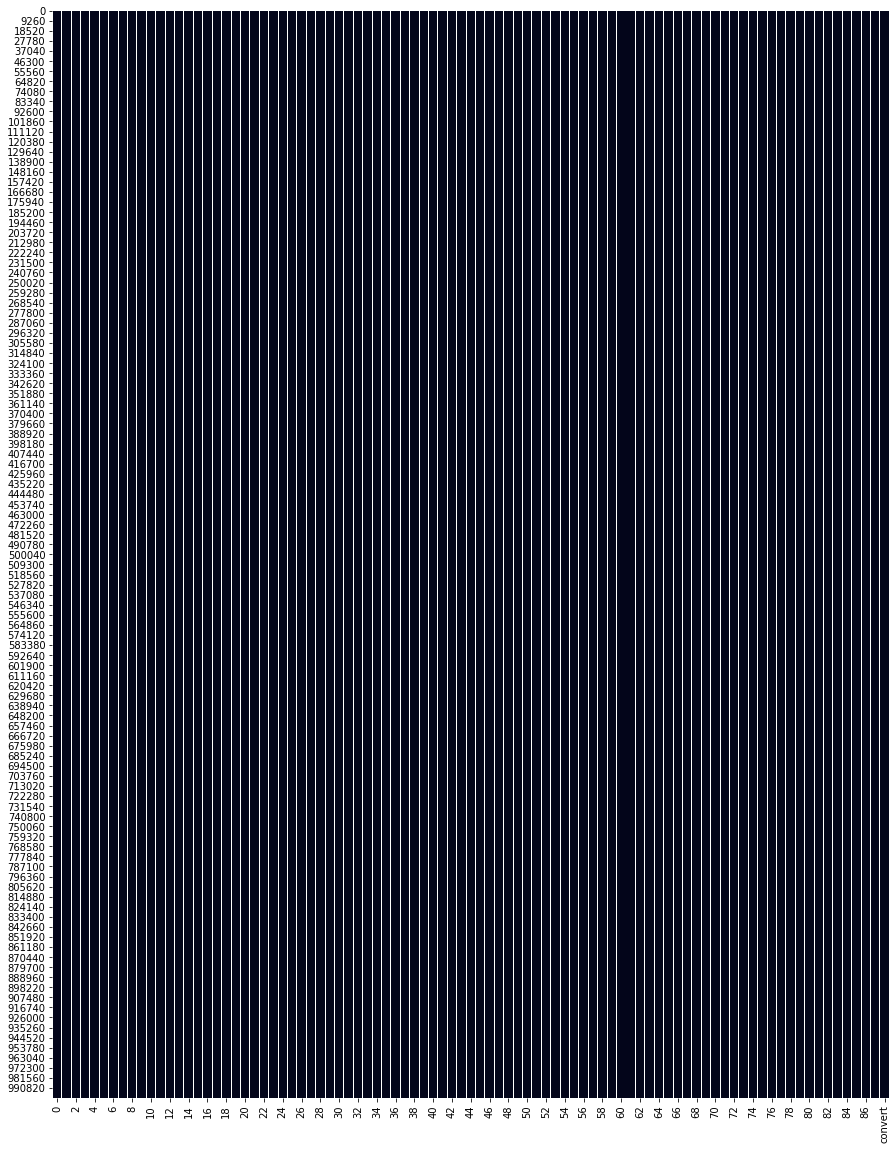

In [ ]:
plt.figure(figsize=(15, 20))
sns.heatmap(full_df.isnull(), cbar=False)        #plotting heatmap using sns library to find missing values in full_df
plt.show()

In [ ]:
full_df.isna().sum()                        # Printing a count of missing value w.r.t each feature in full_df

0          0
1          0
2          0
3          0
4          0
          ..
84         0
85         0
86         0
87         0
convert    0
Length: 89, dtype: int64

# **Analysis of Target Variable**

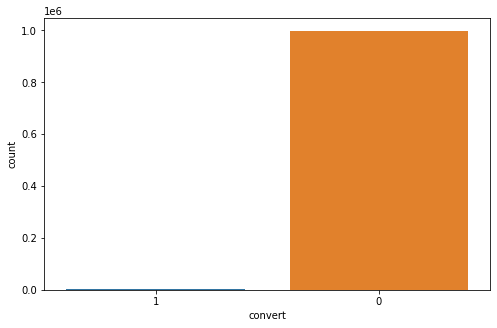

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='convert', data=full_df, order=[1, 0] )

In [ ]:
full_df['convert'].value_counts()           # Prints the count of different classes in 'convert'

0    998092
1      1908
Name: convert, dtype: int64

**Hence, We found that our data is unbalanced.**

In [ ]:
full_df_0 = full_df[full_df.convert==0]           # MAJORITY
full_df_1 = full_df[full_df.convert==1]           # MINORITY

# **Upsampling**

In [ ]:
# Upsample MINORITY Class to make balance data :
full_df_1_upsampled = resample(full_df_1, replace=True, n_samples=6000, random_state=123) 

# **Downsampling**

In [ ]:
# Decreases the rows of Majority one(i.e. having 0 value for 'convert') to make balance data :
full_df_0_downsampled = full_df[full_df.convert==0].sample(n=6000).reset_index(drop=True)

In [ ]:
# Combine downsampled majority class with upsampled minority class
Balanced_full_df = pd.concat([full_df_0_downsampled, full_df_1_upsampled]).reset_index(drop=True)
 
# Display new class counts
Balanced_full_df.convert.value_counts()           # Prints the count of different classes in 'convert'

1    6000
0    6000
Name: convert, dtype: int64

In [ ]:
Balanced_full_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,-0.01,0.35,-2.14,-0.91,1.12,0.45,0.72,0.95,-0.61,1.08,-0.30,0.83,0.12,-1.00,-0.06,-0.37,2.39,-0.59,0.28,-0.05,0.02,-1.42,-0.23,-0.40,-0.35,0.49,-0.77,0.06,-0.14,0.10,0.00,-0.06,-0.02,-0.02,0.05,-0.22,0.09,-0.03,-0.03,0.03,...,-0.12,0.25,-0.08,0.72,-0.65,0.06,-1.96,0.66,0.47,-1.20,0.36,-1.66,0.52,0.28,-0.17,0.82,-1.24,0.64,-0.08,0.86,0.37,0.02,0.23,-0.96,-0.24,-0.02,0.75,-0.73,1.32,0.43,-0.20,1.10,0.63,-0.03,0.61,0.04,-0.05,0.48,-0.16,0
1,-0.02,2.34,-1.56,-0.81,1.06,0.18,-1.26,0.42,-0.28,0.08,0.15,0.60,0.25,-1.00,-0.04,-1.07,0.15,-0.42,0.27,0.12,0.17,0.41,0.31,0.14,0.21,-0.30,0.48,0.05,0.13,-0.06,0.11,0.03,0.03,0.03,0.03,0.01,-0.01,-0.03,-0.01,-0.05,...,0.41,0.16,-0.11,-0.10,-0.03,-0.87,1.66,0.26,-0.66,-0.14,-0.63,0.11,-0.52,-0.64,-0.68,0.16,-0.44,-1.03,0.22,-1.10,0.44,0.46,-0.78,-0.87,0.26,-0.24,-0.58,0.35,0.08,0.93,-0.08,-0.48,0.52,0.08,-0.01,0.02,-0.09,0.17,-0.05,0
2,-0.01,0.27,-1.79,-0.79,1.03,0.45,0.34,0.72,-0.53,0.58,-0.20,0.80,0.00,-0.87,-0.24,-0.97,0.44,-0.56,0.24,-0.03,-0.07,0.34,-0.14,-0.41,-0.29,1.10,-1.18,0.32,-0.43,0.11,-0.13,-0.03,-0.04,-0.08,-0.07,0.12,-0.06,0.04,0.08,0.09,...,-0.00,0.62,1.54,0.43,-1.07,0.10,-1.76,0.16,0.73,-0.39,1.61,0.71,0.92,0.19,-0.51,-0.92,-1.00,-0.15,0.04,-0.09,-1.43,0.48,-0.06,-0.02,0.99,-0.15,-0.19,0.96,0.05,-0.16,-0.17,1.34,0.51,0.15,-2.49,0.03,-0.07,0.72,-0.21,0
3,0.00,-4.53,1.71,-0.28,0.01,0.08,0.56,-0.41,0.33,0.85,-0.68,-0.49,-0.35,1.31,0.16,3.28,0.99,-3.65,0.67,1.90,0.09,-0.80,0.90,-0.33,-1.48,-1.93,-2.01,-0.37,2.97,-1.64,0.48,-1.98,0.06,1.44,3.65,-0.96,-0.52,-0.55,0.61,0.32,...,0.96,0.46,-0.06,1.25,-1.09,0.15,0.42,0.06,2.02,0.17,0.15,0.45,2.51,-2.56,0.95,-0.48,0.48,1.65,-1.67,-0.44,-0.57,-0.04,0.87,-1.01,0.33,0.21,1.49,-3.68,-0.67,-0.57,-0.28,-0.40,0.33,0.30,0.38,2.21,0.37,0.59,-0.10,0
4,-0.02,1.54,2.59,-0.47,0.68,0.08,-0.12,-0.43,0.02,-0.62,0.37,0.00,0.07,-0.30,-0.43,0.43,-0.79,-1.28,0.41,0.61,0.04,-0.43,0.04,0.43,-0.02,-0.37,-0.78,0.28,0.02,0.02,-0.16,-0.06,-0.11,0.03,0.03,0.10,0.11,0.06,0.00,-0.03,...,0.04,-0.12,0.51,-0.34,-0.02,-0.08,0.19,-0.19,-0.31,-0.02,1.78,-1.06,0.24,1.39,-1.12,-0.07,0.48,-0.37,0.86,0.54,-0.78,0.16,-0.03,-0.56,0.35,-0.26,0.25,0.44,-0.04,-0.82,-0.24,-0.28,0.80,-0.36,0.13,-1.44,0.01,-0.56,0.17,0


# **Correlation Matrix and Heat Map**

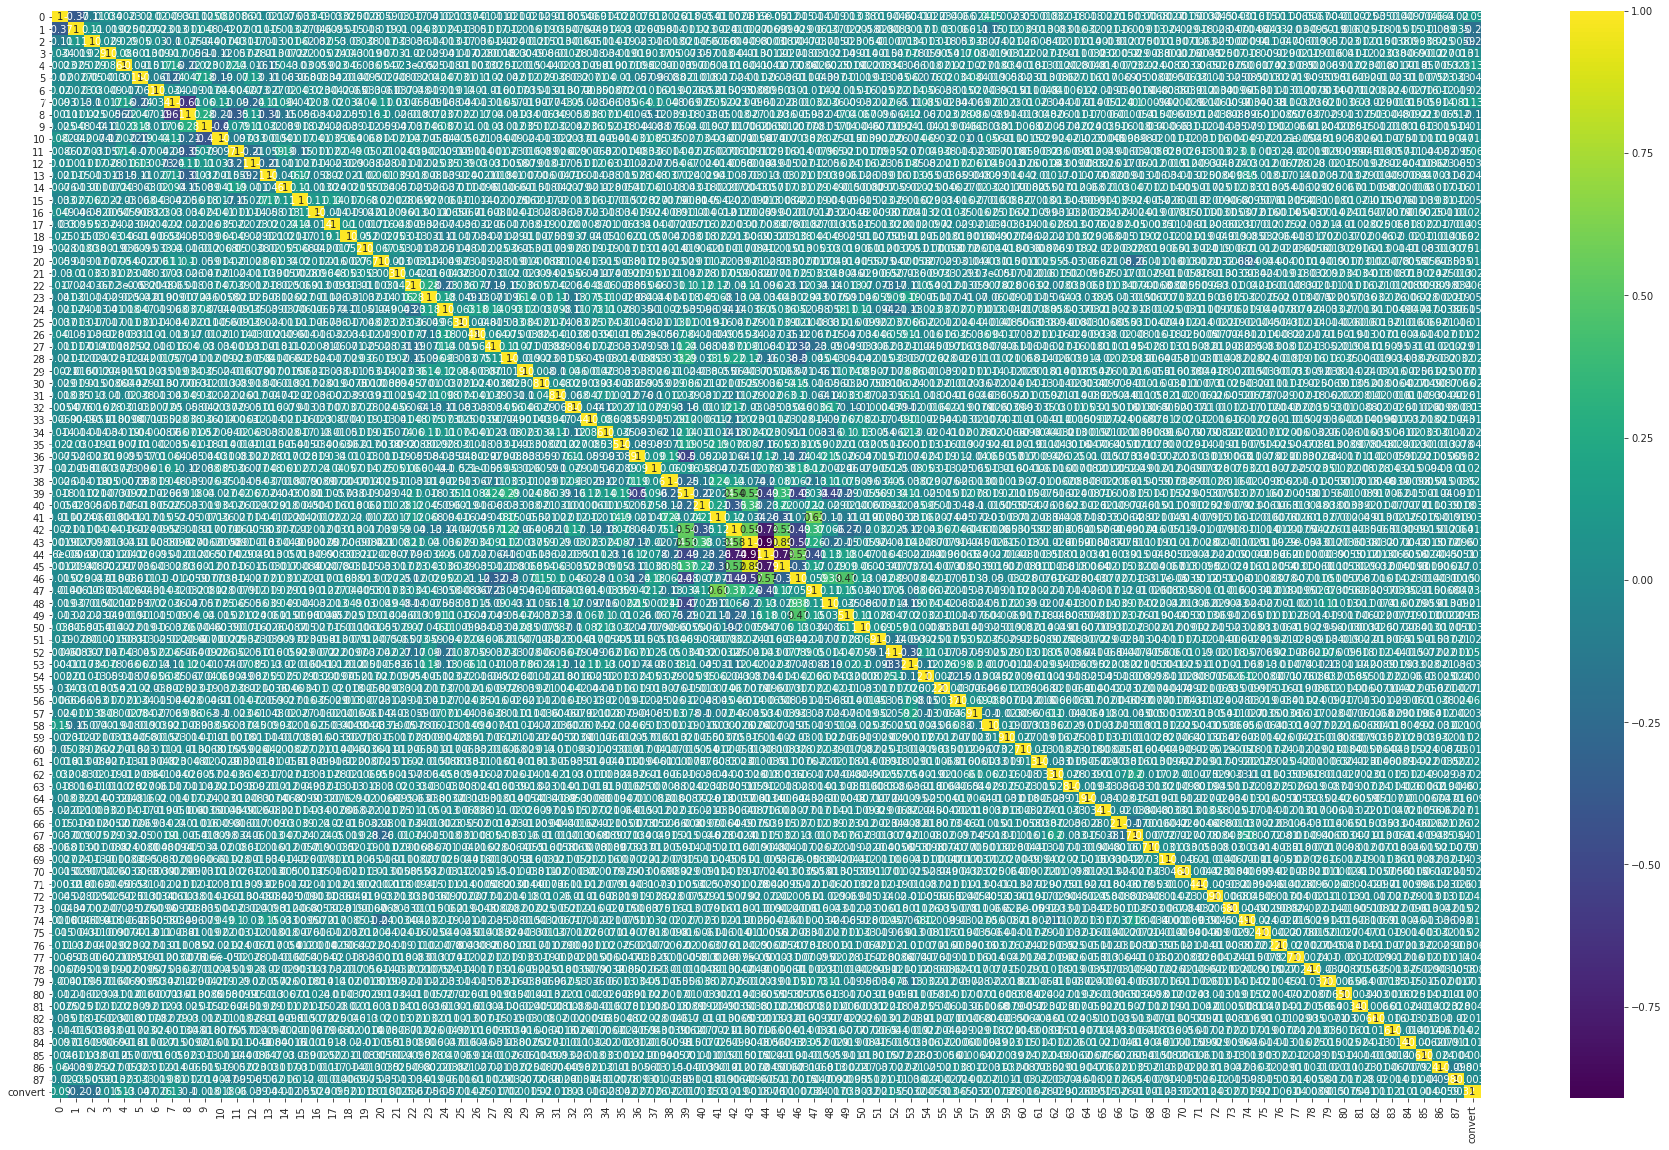

In [ ]:
corr_data = Balanced_full_df.corr()                     # calculating correlation data between features
plt.figure(figsize=(32, 20))                            # setting figure size
sns.set_style('ticks')                                  # setting plot style
sns.heatmap(corr_data, cmap='viridis',annot=True)       # plotting heatmap using sns library
plt.show()

Text(0, 0.5, 'Features')

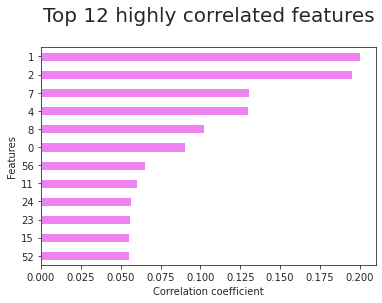

In [ ]:
corr_data.convert.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:13][::-1].plot(kind='barh',color='violet') 
# calculating top 12 highest correlated faetures
# with respect to target variable i.e. "convert"
plt.title("Top 12 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [ ]:
Selected_Features = ['1','2','7','4','8','0','56','11','24','23','15','52']

# **Perform Analysis on Selected Features:**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

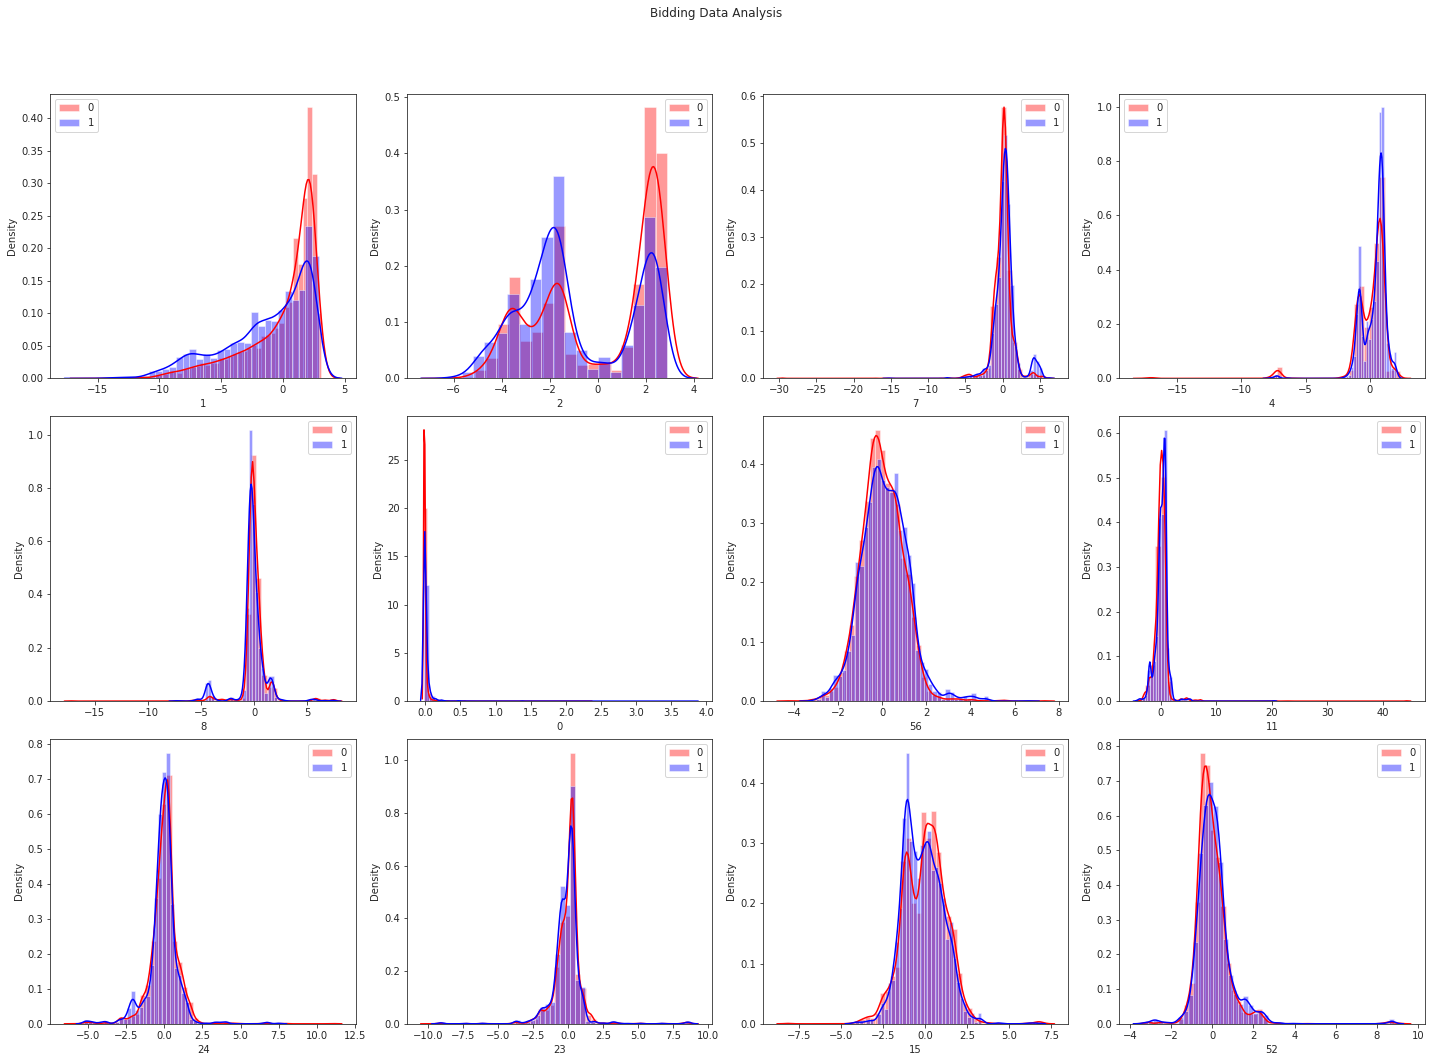

In [ ]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in Selected_Features:
    plt.subplot(3, 4, j+1)
    j += 1
    sns.distplot(Balanced_full_df[i][Balanced_full_df['convert']==0], color='r', label = '0')
    sns.distplot(Balanced_full_df[i][Balanced_full_df['convert']==1], color='b', label = '1')
    plt.legend(loc='best')
fig.suptitle('Bidding Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

In [ ]:
Balanced_full_df_X = Balanced_full_df[Selected_Features]
Balanced_full_df_y = Balanced_full_df.convert

In [ ]:
Balanced_full_df_X.head()

,1,2,7,4,8,0,56,11,24,23,15,52
0,0.35,-2.14,0.95,1.12,-0.61,-0.01,0.66,0.83,-0.35,-0.40,-0.37,0.72
1,2.34,-1.56,0.42,1.06,-0.28,-0.02,0.26,0.60,0.21,0.14,-1.07,-0.10
2,0.27,-1.79,0.72,1.03,-0.53,-0.01,0.16,0.80,-0.29,-0.41,-0.97,0.43
3,-4.53,1.71,-0.41,0.01,0.33,0.00,0.06,-0.49,-1.48,-0.33,3.28,1.25
4,1.54,2.59,-0.43,0.68,0.02,-0.02,-0.19,0.00,-0.02,0.43,0.43,-0.34


In [ ]:
# Splitting Balanced_full_df into 70% and 30% to construct Training and Testing Data respectively.
trainX, testX, trainy, testy = train_test_split(Balanced_full_df_X, Balanced_full_df_y,test_size=0.3,random_state=13)

In [ ]:
trainX.shape

(8400, 12)

In [ ]:
trainX.head()

,1,2,7,4,8,0,56,11,24,23,15,52
6664,-3.46,-2.38,0.97,0.84,-0.71,-0.00,-1.04,1.11,1.34,0.81,-0.65,0.55
10313,2.01,2.41,0.35,-0.10,0.01,-0.02,-0.51,-0.12,0.40,0.44,-1.06,-0.11
1914,1.55,2.53,-0.01,0.86,-0.16,-0.02,0.58,0.32,0.18,0.24,-0.03,-0.25
7984,-8.63,-3.30,0.98,0.61,-0.61,0.06,-0.47,0.78,0.40,-0.72,-0.06,0.39
6614,-3.16,-1.80,-0.22,0.80,-0.12,-0.00,0.73,0.45,-0.16,0.05,-2.27,0.18


In [ ]:
trainy.shape

(8400,)

In [ ]:
trainy.head()

6664     1
10313    1
1914     0
7984     1
6614     1
Name: convert, dtype: int64

In [ ]:
testX.shape

(3600, 12)

In [ ]:
testX.head()

,1,2,7,4,8,0,56,11,24,23,15,52
10844,2.05,2.65,-0.76,0.21,0.41,-0.02,0.08,-0.71,-1.13,-0.77,1.60,0.33
2966,2.15,2.11,-1.02,0.02,0.23,-0.02,0.69,-0.20,1.09,-0.10,1.73,-0.32
1667,-1.22,-2.31,1.00,1.02,-0.48,-0.01,-0.46,0.92,0.16,0.04,-0.89,-0.26
11756,-1.27,-4.54,-0.26,-0.73,-0.42,-0.00,1.24,0.32,-0.49,-0.42,0.89,-0.38
10711,1.20,-1.98,1.60,0.74,-0.28,-0.01,-1.03,-1.10,-0.43,0.55,1.74,0.05


In [ ]:
testy.shape

(2400,)

In [ ]:
testy.head()

10844    1
2966     0
1667     0
11756    1
10711    1
Name: convert, dtype: int64

# **Creating Decision Tree Classifier:**

In [ ]:
#Creating a Decision Tree Classifier
DT_Model = DecisionTreeClassifier(criterion = "entropy",splitter = "random", random_state = 99, max_depth=4, min_samples_leaf=5)  
# Train the model using the training sets
DT_Model.fit(trainX, trainy) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='random')

### **Perform Prediction on Training Data:**

In [ ]:
DT_train_predictions = DT_Model.predict(trainX)

### **Perform Prediction on Testing Data:**

In [ ]:
DT_test_predictions = DT_Model.predict(testX)

# **Evaluation**

### **On Training:**

In [ ]:
print("DT_Confusion Matrix:")
print(confusion_matrix(trainy, DT_train_predictions))

print("DT_Classification Report")
print(classification_report(trainy, DT_train_predictions))

DT_Confusion Matrix:
[[2951 1213]
 [1852 2384]]
DT_Classification Report
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      4164
           1       0.66      0.56      0.61      4236

    accuracy                           0.64      8400
   macro avg       0.64      0.64      0.63      8400
weighted avg       0.64      0.64      0.63      8400



### **On Testing:**

In [ ]:
print("DT_Confusion Matrix:")
print(confusion_matrix(testy, DT_test_predictions))

print("DT_Classification Report")
print(classification_report(testy, DT_test_predictions))

DT_Confusion Matrix:
[[1294  542]
 [ 809  955]]
DT_Classification Report
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1836
           1       0.64      0.54      0.59      1764

    accuracy                           0.62      3600
   macro avg       0.63      0.62      0.62      3600
weighted avg       0.63      0.62      0.62      3600





# **Predictions on Test Data:**

In [ ]:
OutputDF = pd.DataFrame({'Actual_convert':testy,'Predicted_convert':DT_test_predictions})

In [ ]:
#Save to csv
OutputDF.to_csv('biddings_pred.csv',index=False)
OutputDF.head()

,Actual_convert,Predicted_convert
10844,1,0
2966,0,0
1667,0,1
11756,1,1
10711,1,1


**Thank you**,<br>
Nikunj Bansal,<br>
R177218063,<br>
B2 Batch<br>